In [ ]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.4.1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Major project/X-Ray_Image_DataSet'

/content/drive/.shortcut-targets-by-id/1dApjB8QlA_GPfkRWEbxHYkYhhdV8NlFz/Major project/X-Ray_Image_DataSet


In [ ]:
ls

 assets/                  best_model_multi_2.h5    k_fold_model.h5
 best_model1.h5           best_model_multi_3.h5    model_best.h5
 best_model4.h5           best_model_multi_4.h5    modellayer_prop/
 best_model5.h5           best_model_multi_5.h5    modellayer_prop.h5
 best_model6.h5           Covid-19/                modelLayer_prop.h5
 best_model_binary_1.h5   covid_adjusted/          modelvgg.h5
 best_model_binary_2.h5   covidnet_b.h5            No_findings/
 best_model_binary_3.h5   covidnet_m.h5            Pneumonia/
 best_model_binary_4.h5   DarkNetTrain-3.pth       saved_model.pb
 best_model_binary_5.h5   desnet121_model_b.h5    'three class'/
 best_model_binary.h5     inceptionV3_model_b.h5   Train/
 best_model.h5            inceptionV3_model_m.h5   Valid/
 best_model_multi_1.h5    k_fold_model_dense.h5    variables/


In [ ]:
import numpy as np
import os
import time
# from resnet50 import ResNet50
from keras.preprocessing.image import load_img,img_to_array
# from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten

# from keras.applications.vgg19 import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split #cross-validation

In [ ]:
PATH = os.getcwd()
# Define data path
data_path = PATH
data_dir_list = os.listdir(data_path)
data_dir_list
data_dir_list
data_dir_list=['No_findings','Pneumonia','Covid-19']
data_dir_list

['No_findings', 'Pneumonia', 'Covid-19']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2, time
import tensorflow as tf

tf.__version__

'2.4.1'

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
# from keras.applications.vgg19 import preprocess_input
from keras.applications.resnet50 import preprocess_input
from pickle import dump
import os

covid_fold=[]
Pneumonia_fold=[]
normal_fold=[]
count=0
for dataset in data_dir_list:
  img_list=os.listdir(data_path+'/'+ dataset)
  print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
  for img in img_list:
    
    img_path =data_path+'/'+dataset + '/'+ img
    if dataset=='No_findings':
      normal_fold.append(img_path)
      # normal_labels.append(0)
    elif dataset=='Pneumonia':
      Pneumonia_fold.append(img_path)
      # Pneumonia_labels.append(1)
    elif dataset=='Covid-19':
      covid_fold.append(img_path)
      # covid_labels.append(2)
    count+=1
    if count%50==0:
      print(img_path," ",count)

Loaded the images of dataset-No_findings

/content/drive/.shortcut-targets-by-id/1dApjB8QlA_GPfkRWEbxHYkYhhdV8NlFz/Major project/X-Ray_Image_DataSet/No_findings/00001281_000.png   50
/content/drive/.shortcut-targets-by-id/1dApjB8QlA_GPfkRWEbxHYkYhhdV8NlFz/Major project/X-Ray_Image_DataSet/No_findings/00003363_002.png   100
/content/drive/.shortcut-targets-by-id/1dApjB8QlA_GPfkRWEbxHYkYhhdV8NlFz/Major project/X-Ray_Image_DataSet/No_findings/00002679_000.png   150
/content/drive/.shortcut-targets-by-id/1dApjB8QlA_GPfkRWEbxHYkYhhdV8NlFz/Major project/X-Ray_Image_DataSet/No_findings/00001613_003.png   200
/content/drive/.shortcut-targets-by-id/1dApjB8QlA_GPfkRWEbxHYkYhhdV8NlFz/Major project/X-Ray_Image_DataSet/No_findings/00003130_004.png   250
/content/drive/.shortcut-targets-by-id/1dApjB8QlA_GPfkRWEbxHYkYhhdV8NlFz/Major project/X-Ray_Image_DataSet/No_findings/00002301_000.png   300
/content/drive/.shortcut-targets-by-id/1dApjB8QlA_GPfkRWEbxHYkYhhdV8NlFz/Major project/X-Ray_Image_DataSet/

In [ ]:
fold_train=[]
fold_test=[]
prev1=0
prev2=0
prev3=0
for i in range(5):
  next1=int((len(covid_fold)/5)*(i+1))
  next2=int((len(normal_fold)/5)*(i+1))
  next3=int((len(Pneumonia_fold)/5)*(i+1))
  fold_train.append((covid_fold[:prev1]+covid_fold[next1:],normal_fold[:prev2]+normal_fold[next2:],Pneumonia_fold[:prev3]+Pneumonia_fold[next3:]))
  fold_test.append((covid_fold[prev1:next1],normal_fold[prev2:next2],Pneumonia_fold[prev3:next3]))

  
  prev1=next1
  prev2=next2
  prev3=next3


In [ ]:
len(fold_train)

5

In [ ]:
%cd '/content/drive/MyDrive/Major project/FOLD/5'

/content/drive/.shortcut-targets-by-id/1dApjB8QlA_GPfkRWEbxHYkYhhdV8NlFz/Major project/FOLD/5


In [ ]:
train_covid=[]
train_normal=[]
train_Pneumonia=[]
test_covid=[]
test_normal=[]
test_Pneumonia=[]

path='/content/drive/MyDrive/Major project/FOLD/5'
for img in os.listdir(path+'/Train/Covid-19'):
  img_path=path+'/Train/Covid-19/'+img
  train_covid.append(img_path)

for img in os.listdir(path+'/Train/No-findings'):
  img_path=path+'/Train/No-findings/'+img
  train_normal.append(img_path)

for img in os.listdir(path+'/Train/Pneumonia'):
  img_path=path+'/Train/Pneumonia/'+img
  train_Pneumonia.append(img_path) 

for img in os.listdir(path+'/Valid/Covid-19'):
  img_path=path+'/Valid/Covid-19/'+img
  test_covid.append(img_path)

for img in os.listdir(path+'/Valid/No-findings'):
  img_path=path+'/Valid/No-findings/'+img
  test_normal.append(img_path)

for img in os.listdir(path+'/Valid/Pneumonia'):
  img_path=path+'/Valid/Pneumonia/'+img
  test_Pneumonia.append(img_path)

#Preprocessing

In [ ]:
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
# from keras.applications.vgg19 import preprocess_input
# from keras.applications.densenet import preprocess_input
from keras.applications.resnet50 import preprocess_input
from pickle import dump
import os

X_train=[]
X_test=[]
y_train=[]
y_test=[]

# train_covid,train_normal,train_Pneumonia=fold_train[4]
# test_covid,test_normal,test_Pneumonia=fold_test[4]

#covid
print("covid")
for img_path in train_covid:
  # !cp -R "$img_path" '/content/drive/MyDrive/Major project/FOLD++/5/Train/Covid-19'
  image = load_img(img_path, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((1,image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  X_train.append(image)
  y_train.append(1)

for img_path in test_covid:
  # !cp -R "$img_path" '/content/drive/MyDrive/Major project/FOLD++/5/Valid/Covid-19'
  image = load_img(img_path, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((1,image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  X_test.append(image)
  y_test.append(1)


#normal
print("normal")
for img_path in train_normal:
  # !cp -R "$img_path" '/content/drive/MyDrive/Major project/FOLD++/5/Train/No-findings'
  image = load_img(img_path, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((1,image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  X_train.append(image)
  y_train.append(0)

for img_path in test_normal:
  # !cp -R "$img_path" '/content/drive/MyDrive/Major project/FOLD++/5/Valid/No-findings'
  image = load_img(img_path, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((1,image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  X_test.append(image)
  y_test.append(0)


# #Pneumonia
print("Pneumonia")
for img_path in train_Pneumonia:
  # !cp -R "$img_path" '/content/drive/MyDrive/Major project/FOLD++/5/Train/Pneumonia'
  image = load_img(img_path, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((1,image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  X_train.append(image)
  y_train.append(2)

for img_path in test_Pneumonia:
  # !cp -R "$img_path" '/content/drive/MyDrive/Major project/FOLD++/5/Valid/Pneumonia'
  image = load_img(img_path, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((1,image.shape[0], image.shape[1], image.shape[2]))
  image = preprocess_input(image)
  X_test.append(image)
  y_test.append(2)

covid
normal
Pneumonia


In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
X_train = X_train .astype('float32')
X_train=np.rollaxis(X_train,1,0)
X_train=X_train[0]
print (X_train.shape)

X_test =X_test .astype('float32')
X_test=np.rollaxis(X_test,1,0)
X_test=X_test[0]
print (X_test.shape)

(900, 224, 224, 3)
(225, 224, 224, 3)


In [ ]:
import random

c = list(zip(X_train, y_train))

random.shuffle(c)

X_train, y_train = zip(*c)


c = list(zip(X_test, y_test))

random.shuffle(c)

X_test, y_test = zip(*c)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((900, 224, 224, 3), (225, 224, 224, 3), (900, 3), (225, 3))

#ResNet50 modified

In [ ]:
import numpy as np
import pandas as pd
import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import np_utils
# from keras.utils import multi_gpu_model
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.applications.resnet50 import ResNet50
channels = 3



pretrained_model =ResNet50(weights='imagenet', include_top=False ,input_shape=[224, 224, 3])
pretrained_model.trainable = False

# We take the last layer of our the model and add it to our classifier
last = pretrained_model.layers[-1].output
x = Flatten(name='flatten')(last)
x = Dense(2048, activation='relu', name='fc1')(x)
x = Dense(2048, activation='relu', name='fc2')(x)
x = Dense(3, activation='softmax', name='predictions')(x)


model3 = Model(pretrained_model.input, x)
# We compile the model
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model3.summary()

94773248/94765736 [==============================] - 3s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_____________________________

In [ ]:
# import numpy as np
# import pandas as pd
# import keras
# from keras.callbacks import EarlyStopping
# from keras.callbacks import TensorBoard
# from keras.layers import Dense, Activation, Flatten, Dropout
# from keras.layers import MaxPooling2D
# from keras.layers.convolutional import Conv2D
# from keras.models import Sequential
# from keras.utils import np_utils
# # from keras.utils import multi_gpu_model
# from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from keras.models import Model
# from keras.applications.resnet50 import ResNet50
# channels = 3



# pretrained_model =ResNet50(weights='imagenet', include_top=False ,input_shape=[224, 224, 3])
# pretrained_model.trainable = False
# keras_input = Input(shape=(224,224,3), name = 'image_input')
    
# #Use the generated model 
# output_vgg19_conv = pretrained_model(keras_input)

# #Add the fully-connected layers 
# x = Flatten(name='flatten')(output_vgg19_conv)
# x = Dense(2048, activation='relu', name='fc1')(x)
# x = Dense(2048, activation='relu', name='fc2')(x)
# x = Dense(3, activation='softmax', name='predictions')(x)
# # x = Dense(3, activation='softmax', name='predictions')(pretrained_model.layers[-2].output)
# # model2.add(Dense(3, activation='softmax'))
# # model2 =Model(inputs=pretrained_model.input,outputs=x)
# # model2 = tf.keras.Sequential([
# #     model1,

# #     tf.keras.layers.Flatten(),
# #     tf.keras.layers.Dense(3, activation='softmax')
# # ])

# model2 = Model(inputs=keras_input, outputs=x)

# model2.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# print(model2.summary())

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
fc1 (Dense)                  (None, 2048)              205522944 
_________________________________________________________________
fc2 (Dense)                  (None, 2048)              4196352   
_________________________________________________________________
predictions (Dense)          (None, 3)                 6147      
Total params: 233,313,155
Trainable params: 209,725,443
Non-trainable params: 23,587,712
____________________________________

In [ ]:
 model2.get_layer('resnet50').get_layer('conv5_block3_3_conv').name

'conv5_block3_3_conv'

In [ ]:
cd ../../../../..

/content/drive


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
mc = ModelCheckpoint('best_model_delete3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# fit model
hist = model3.fit(X_train,y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test),callbacks=[es, mc])

Epoch 1/20
29/29 [==============================] - 27s 829ms/step - loss: 87.0161 - accuracy: 0.4250 - val_loss: 1.8267 - val_accuracy: 0.7556

Epoch 00001: val_accuracy improved from -inf to 0.75556, saving model to best_model_delete3.h5
Epoch 2/20
29/29 [==============================] - 24s 818ms/step - loss: 0.8165 - accuracy: 0.8358 - val_loss: 1.2177 - val_accuracy: 0.8222

Epoch 00002: val_accuracy improved from 0.75556 to 0.82222, saving model to best_model_delete3.h5
Epoch 3/20
29/29 [==============================] - 23s 807ms/step - loss: 0.3041 - accuracy: 0.9413 - val_loss: 0.9817 - val_accuracy: 0.8533

Epoch 00003: val_accuracy improved from 0.82222 to 0.85333, saving model to best_model_delete3.h5
Epoch 4/20
29/29 [==============================] - 24s 817ms/step - loss: 0.0311 - accuracy: 0.9872 - val_loss: 0.9876 - val_accuracy: 0.8133

Epoch 00004: val_accuracy did not improve from 0.85333
Epoch 5/20
29/29 [==============================] - 24s 822ms/step - loss: 0.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

# Display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from keras.applications.imagenet_utils import decode_predictions

In [ ]:
import os
import keras
from keras.applications.resnet50 import preprocess_input

from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
from keras.preprocessing import image

def transform_img_fn():
    out = []
    out_other = []
    for img_path in test_covid:
        img = image.load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = img.reshape((1,img.shape[0], img.shape[1], img.shape[2]))
        img_other = tf.keras.applications.mobilenet.preprocess_input(img.copy())
        img = preprocess_input(img)
        out.append(img)
        out_other.append(img_other)
    return (np.vstack(out), np.vstack(out_other))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(25, 224, 224, 3)
[[3.4486674e-22 1.0000000e+00 1.7280748e-24]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [2.0742546e-17 1.0000000e+00 1.6183972e-18]
 [3.5704348e-09 9.9987435e-01 1.2562552e-04]
 [1.0782799e-15 1.0000000e+00 7.4636639e-18]
 [1.0184516e-16 1.0000000e+00 1.7788005e-15]
 [9.5855586e-38 1.0000000e+00 3.8681400e-34]
 [1.9309693e-11 1.0000000e+00 1.5119119e-13]
 [1.3410363e-21 1.0000000e+00 3.7188090e-24]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [4.3525696e-26 1.0000000e+00 5.9623633e-27]
 [7.0757921e-20 9.9978417e-01 2.1582920e-04]
 [1.2577003e-06 2.7944908e-01 7.2054970e-01]
 [1.9699080e-10 1.0000000e+00 6.9465648e-16]
 [2.4944218e-05 9.9623704e-01 3.7379379e-03]
 [6.5217920e-22 1.0000000e+00 1.7068414e-24]
 [3.1070173e-05 9.9936181e-01 6.0706219e-04]
 [1.4768062e-29 1.0000000e+00 5.5390720e-29]
 [2.6020588e-22 1.0000000e+00 2.0553871e-20]
 [6.7672264e-36 1.0000000e+00 4.2149245e-33]
 [9.1074317e-16 1.0000000e+00 6.61968

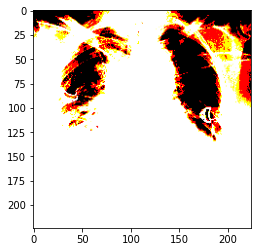

In [ ]:
images, images_other = transform_img_fn()

print(images.shape)

plt.imshow(images[0] / 2 + 0.5)
preds = model3.predict(images)
print(preds)


In [ ]:
# last_conv_layer_name = "resnet50/conv5_block3_3_conv"
# last_conv_layer = model2.get_layer('resnet50').get_layer('conv5_block3_3_conv')
last_conv_layer_name = 'conv5_block3_3_conv'
classifier_layer_names = [
    "predictions",
]



In [ ]:
from keras.applications.resnet50 import preprocess_input

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299

    img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        # print(preds[0])
        top_pred_index = tf.argmax(preds[0][0][0])
        # print(top_pred_index)
        top_class_channel = preds[:, top_pred_index]
        # print("--")
    # print("**")
    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
    return heatmap

tf.Tensor(
[[[0.3750443  0.3096893  0.3152664 ]
  [0.37052682 0.32751238 0.3019608 ]
  [0.3597565  0.3428203  0.29742318]
  [0.351508   0.3606039  0.28788814]
  [0.36255902 0.3467323  0.2907087 ]
  [0.3932794  0.3137797  0.29294088]
  [0.39796436 0.29798663 0.304049  ]]

 [[0.37282738 0.3026693  0.3245033 ]
  [0.36893636 0.3195817  0.31148198]
  [0.36395282 0.34072822 0.29531893]
  [0.35286656 0.3655889  0.28154454]
  [0.3542437  0.34914324 0.29661307]
  [0.3570786  0.30620116 0.33672026]
  [0.39371538 0.2733632  0.33292142]]

 [[0.37672335 0.28755873 0.33571792]
  [0.37351242 0.3060345  0.32045314]
  [0.3565609  0.34499678 0.2984423 ]
  [0.34166923 0.36888826 0.2894425 ]
  [0.34468737 0.35204962 0.30326298]
  [0.34700096 0.31426287 0.33873612]
  [0.37811893 0.28300518 0.3388759 ]]

 [[0.38145506 0.2766282  0.34191674]
  [0.38933146 0.27874726 0.33192128]
  [0.37431303 0.31572285 0.30996418]
  [0.33744088 0.3490417  0.31351742]
  [0.3604331  0.32326293 0.316304  ]
  [0.38753378 0.26714

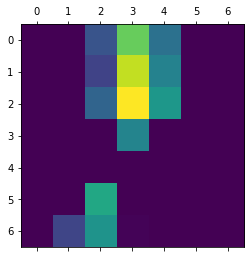

In [ ]:
img_path = test_covid[0]
img_size = (224, 224)

img_array = preprocess_input(get_img_array(img_path, size=img_size))
img_array.shape

preds = model.predict(img_array)
# print(preds)

heatmap = make_gradcam_heatmap(
    img_array, model3, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

tf.Tensor(
[[[0.3162112  0.3092605  0.37452832]
  [0.31839424 0.31272393 0.36888185]
  [0.31368002 0.30423707 0.3820829 ]
  [0.30639586 0.30236685 0.39123726]
  [0.2959003  0.30937052 0.3947292 ]
  [0.2637176  0.33715758 0.39912483]
  [0.28291065 0.34198847 0.37510082]]

 [[0.32269672 0.31723678 0.3600665 ]
  [0.31906265 0.31913123 0.36180615]
  [0.29895195 0.3093125  0.39173552]
  [0.27469403 0.30787876 0.4174272 ]
  [0.26388454 0.31403583 0.42207962]
  [0.26511335 0.34530312 0.3895835 ]
  [0.2978957  0.34802827 0.35407603]]

 [[0.30475038 0.3302329  0.36501673]
  [0.28483036 0.32717946 0.3879902 ]
  [0.26606694 0.3233243  0.41060877]
  [0.2421294  0.31518242 0.44268823]
  [0.2387247  0.31957614 0.44169915]
  [0.26537886 0.338635   0.3959861 ]
  [0.29530314 0.34602568 0.3586712 ]]

 [[0.29904854 0.33439657 0.3665549 ]
  [0.2762903  0.32283697 0.4008728 ]
  [0.24449256 0.3133131  0.4421944 ]
  [0.24701694 0.3042476  0.44873554]
  [0.2391242  0.29253188 0.4683439 ]
  [0.26424116 0.31300

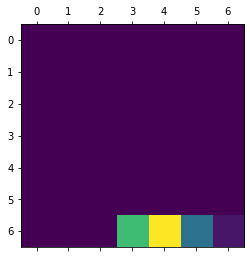

In [ ]:
# img_array = images

# # Make model
# model = model3

# # Print what the top predicted class is
# preds = model3.predict(img_array)
# # print('Predicted:', decode_predictions(preds, top=1)[0])

# # Generate class activation heatmap
# heatmap = make_gradcam_heatmap(
#     img_array, model3, last_conv_layer_name, classifier_layer_names
# )

# # Display heatmap
# plt.matshow(heatmap)
# plt.show()

In [ ]:
 # We load the original image
out_folder = 'GradCAM_output2'
# k=0
for img_path in test_covid:

  # img_path = test_covid[k]
  # k=k+1
  img_size = (224, 224)

  img_array = preprocess_input(get_img_array(img_path, size=img_size))
  img_array.shape

  preds = model.predict(img_array)
  # print(preds)

  heatmap = make_gradcam_heatmap(
      img_array, model3, last_conv_layer_name, classifier_layer_names
  )

  # Display heatmap
  plt.matshow(heatmap)
  plt.show()


  img = keras.preprocessing.image.load_img(img_path)
  img = keras.preprocessing.image.img_to_array(img)



  # We rescale heatmap to a range 0-255
  heatmap = np.uint8(255 * heatmap)

  # We use jet colormap to colorize heatmap
  jet = cm.get_cmap("jet")

  # We use RGB values of the colormap
  jet_colors = jet(np.arange(256))[:, :3]
  jet_heatmap = jet_colors[heatmap]

  # We create an image with RGB colorized heatmap
  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  # Superimpose the heatmap on original image
  superimposed_img = jet_heatmap * 0.4 + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

  # Save the superimposed image
  img_name = str(img_path.split('/')[-1])
  save_path = os.path.join(out_folder,img_name)
  superimposed_img.save(save_path)

  # Display Grad CAM
  display(Image(save_path))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
 2

2

In [ ]:
import os
import keras
from keras.applications.resnet50 import preprocess_input

from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
from keras.preprocessing import image

def transform_img_fn():
    out = []
    out_other = []
    for img_path in test_covid:
        img = image.load_img(img_path, target_size=(224, 224))
        img = img_to_array(img)
        img = img.reshape((1,img.shape[0], img.shape[1], img.shape[2]))
        img_other = tf.keras.applications.mobilenet.preprocess_input(img.copy())
        img = preprocess_input(img)
        out.append(img)
        out_other.append(img_other)
    return (np.vstack(out), np.vstack(out_other))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1.5237422e-15 1.0000000e+00 2.7588832e-11]
 [4.8098125e-33 1.0000000e+00 3.9616168e-29]
 [7.1303461e-09 9.9945968e-01 5.4026663e-04]
 [5.7694915e-06 4.6687473e-02 9.5330679e-01]
 [1.5096542e-11 1.0000000e+00 2.3012621e-08]
 [2.4372304e-10 9.9994099e-01 5.9046888e-05]
 [1.9205817e-26 1.0000000e+00 1.4284093e-19]
 [3.1578836e-06 9.9724281e-01 2.7540086e-03]
 [1.1339726e-18 1.0000000e+00 1.2723089e-15]
 [2.6966144e-22 1.0000000e+00 8.1957609e-18]
 [1.3068160e-37 1.0000000e+00 2.4608244e-32]
 [1.5764905e-13 1.0000000e+00 1.6711632e-10]
 [2.4322695e-20 9.9999905e-01 9.4291784e-07]
 [2.3515822e-08 1.9454474e-02 9.8054552e-01]
 [5.3025894e-07 9.9999928e-01 1.9483190e-07]
 [4.3374812e-03 7.2636062e-01 2.6930183e-01]
 [3.6613204e-17 1.0000000e+00 8.1751378e-14]
 [5.5928678e-05 4.4144229e-03 9.9552971e-01]
 [3.9759734e-27 1.0000000e+00 2.6228782e-21]
 [3.9930844e-14 1.0000000e+00 7.1836537e-10]
 [1.3063684e-28 1.0000000e+00 7.9582373e-22]
 [4.0041321e-12 1.0000000e+00 7.7608249e-09]
 [1.754437

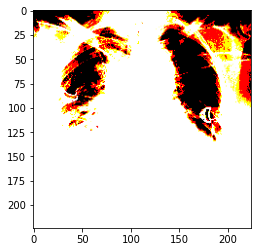

In [ ]:
images, images_other = transform_img_fn()
plt.imshow(images[0] / 2 + 0.5)
preds = model2.predict(images)
print(preds)


In [ ]:
pip install lime

     |████████████████████████████████| 276kB 7.0MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=4714ee2e0d9b72872dfb3f20ac7532c4df1c328d27d1c907b96b1782ef4cc056
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:

%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

In [ ]:
# %cd '/content/drive/MyDrive/LIME Images/'
%cd '/content/drive/MyDrive/LIME_output/'

/content/drive/MyDrive/LIME_output


In [ ]:
cd 6

/content/drive/My Drive/LIME Images (1)/6


In [ ]:
from skimage.segmentation import mark_boundaries
num_feature_list = [1,2,3,4,5,6,7,8,9,10]
# out_folder = 'LIME_output'

for i in num_feature_list:
  j=0 
  print("for num features = ",i)
  for img_path in test_covid:
    if not os.path.exists(str(i)):
        print("directory made")
        os.makedirs(str(i))

    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(images[j].astype('double'), model3.predict, top_labels=3, hide_color=0, num_samples=1000)
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=i, hide_rest=True)
    img_name = str(img_path.split('/')[-1])
    filename = os.path.join(str(i),img_name)

    plt.imsave(fname = filename, arr = mark_boundaries(images_other[j] / 2 + 0.5, mask))
    j=j+1

for num features =  1
directory made



for num features =  2
directory made



for num features =  3
directory made



for num features =  4
directory made



for num features =  5
directory made



for num features =  6
directory made



for num features =  7
directory made



for num features =  8
directory made


In [ ]:
 
from skimage.segmentation import mark_boundaries
'''change images[0] to images[1] to move to the next picture"'''
for i in [0,1,2,4,5,6,7,8,9,10,11,12,14,15,16,18,19,20,21,22,24]:

  explainer = lime_image.LimeImageExplainer()
  explanation = explainer.explain_instance(images[i].astype('double'), model2.predict, top_labels=3, hide_color=0, num_samples=1000)
  temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=6, hide_rest=True)
  filename = str(i) + ".png"
  plt.imsave(fname = filename, arr = mark_boundaries(images_other[i] / 2 + 0.5, mask))

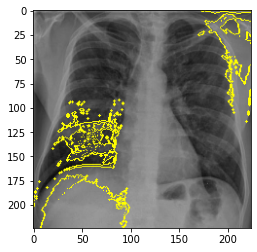

In [ ]:

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=4, hide_rest=True)
plt.imshow(mark_boundaries(images_other[24] / 2 + 0.5, mask))

In [ ]:
plt.imsave(fname = "24.png", arr = mark_boundaries(images_other[24] / 2 + 0.5, mask))

In [ ]:
ls

0.png   12.png  16.png  1.png   22.png  4.png  7.png
10.png  14.png  18.png  20.png  24.png  5.png  8.png
11.png  15.png  19.png  21.png  2.png   6.png  9.png
